# Auto Encoder를 이용한 Fashion Mnist

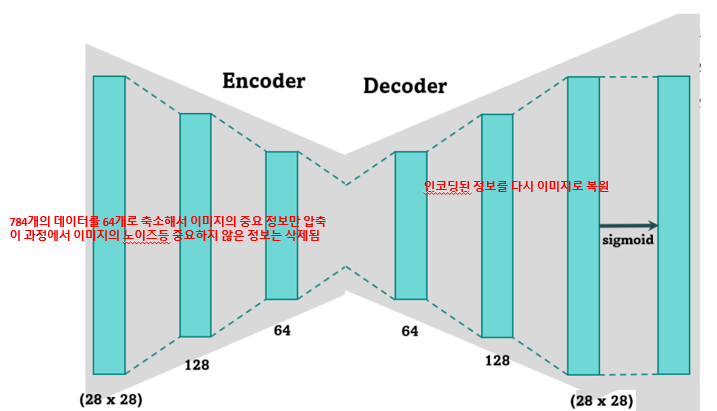

In [50]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [13]:
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()

Text(0.5, 1.0, '9')

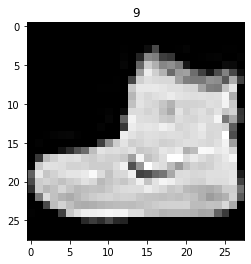

In [ ]:
plt.imshow(X_train[0])
plt.gray()
plt.title(y_train[0])

In [15]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [16]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
encoder = Sequential(
    [
     Flatten(input_shape=(28, 28)),
     Dense(128, activation ='relu'),
     Dense(64, activation ='relu')
    ]
)

In [29]:
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
Total params: 108,736
Trainable params: 108,736
Non-trainable params: 0
_________________________________________________________________


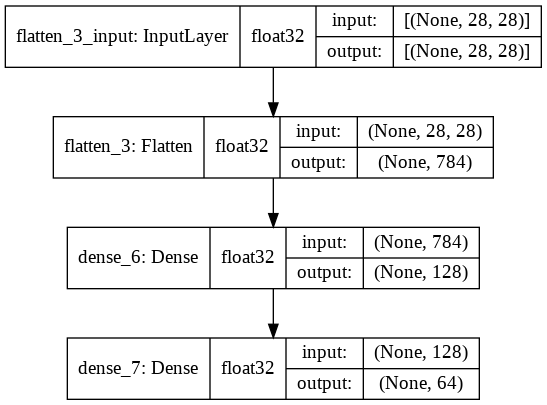

In [31]:
plot_model(encoder, show_dtype= True, show_shapes=True)

In [33]:
# 인코딩된 정보를 다시 디코딩
decoder = Sequential([
                      # 1차원일때 칸 생략 가능
                      Dense(128, input_shape=(64,), activation ='relu'),
                      Dense(784, activation = 'sigmoid'),
                      Reshape((28, 28))
])

In [34]:
decoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_9 (Dense)              (None, 784)               101136    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 109,456
Trainable params: 109,456
Non-trainable params: 0
_________________________________________________________________


In [41]:
class Autoencoder(Model):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    # 학습할떄 실행되는 함수
    def call(self, x):

        # 28 * 28 데이터의 784개 데이터를 인코딩
        encoded = self.encoder(x)

        # 인코딩된 데이터를 다시 디코딩
        decoded = self.decoder(encoded)
        return decoded

In [42]:
auto_encoder = Autoencoder(encoder, decoder)

In [51]:
auto_encoder.compile(optimizer = Adam(learning_rate=0.001), loss = MeanSquaredError())

In [52]:
auto_encoder.fit(
    x =X_train, # 복원 이미지
    y = X_train, # 찐 이미지 # (복원 - 찐)^2 의 평균이 0이 되도록 학습(MSE)
    epochs = 30,
    validation_data=(X_test, X_test)

)

Epoch 1/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0220 - val_loss: 0.0143
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0128 - val_loss: 0.0118
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - val_loss: 0.0107
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0103 - val_loss: 0.0101
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0087 - val_loss: 0.0087
Epoch 9/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0086 - val_loss: 0.0087
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

# CNN을 이용한 Auto Encoder

In [59]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [54]:
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()

In [57]:
# 타입 변환
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# 차원 변환 : CNN은 4차원 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [64]:
encoder = Sequential(
            [
              Conv2D(
                  16, kernel_size= (3,3), strides=2 , padding="SAME", activation="relu",
                  input_shape=(28,28,1)
                   ),
              Conv2D(8, kernel_size=(3,3), strides=2, padding="SAME",activation="relu" )
            ])

In [66]:
encoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [65]:
# 디코더
decoder = Sequential([
                      Conv2DTranspose(
                          8, kernel_size=3, padding="SAME", activation="relu"
                          ,input_shape=(7,7,8), strides=2
                        ),
                      Conv2DTranspose(
                          16, kernel_size=3, padding="SAME", activation="relu"
                          ,strides=2
                        ),
                      Conv2D(1, kernel_size=3, padding="SAME", activation="relu")

])

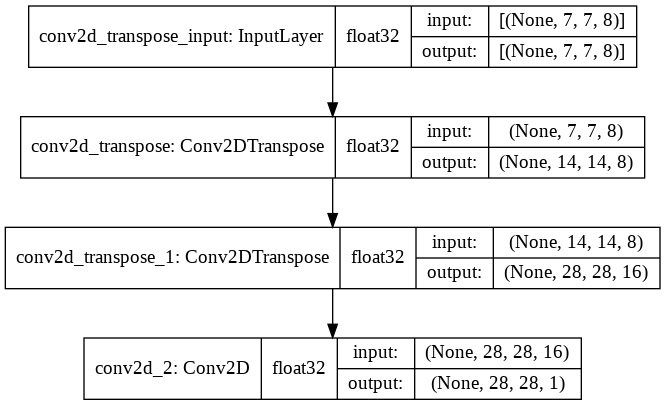

In [67]:
plot_model(decoder, show_dtype=True, show_shapes=True)

In [68]:
class AutoEncoder(Model):
    def __init__(self, encoder, decoder):
        super(AutoEncoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [69]:
auto_encoder = AutoEncoder(encoder, decoder)

In [70]:
auto_encoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

In [71]:
auto_encoder.fit(
    x=X_train,
    y=X_train,
    epochs=30,
    validation_data=(X_test, X_test)
)

Epoch 1/30
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0096 - val_loss: 0.0036
Epoch 2/30
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 3/30
1874/1875 [============================>.] - ETA: 0s - loss: 0.0025

KeyboardInterrupt: ignored

# 실습

## Auto Encoder을 이용한 패션 Mnist 생성
- 17~ 33

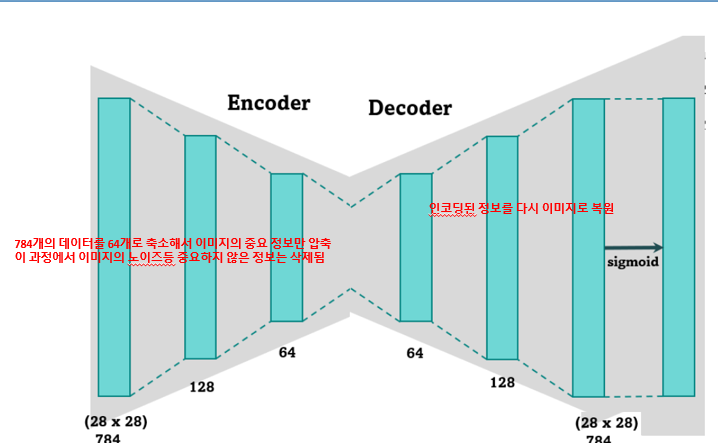

In [72]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [73]:
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()

In [75]:
# 타입변환
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

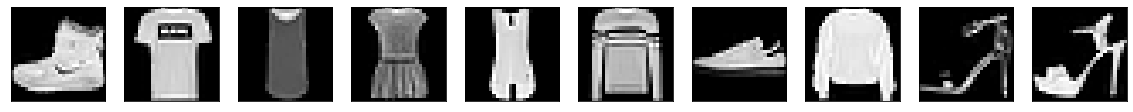

In [78]:
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax= plt.subplot(1, n, i+1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [79]:
# 인코딩
encoder = Sequential(
    [
     Flatten(input_shape=(28, 28)),
     Dense(64, activation ='relu')
    ]
)

In [80]:
encoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                50240     
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


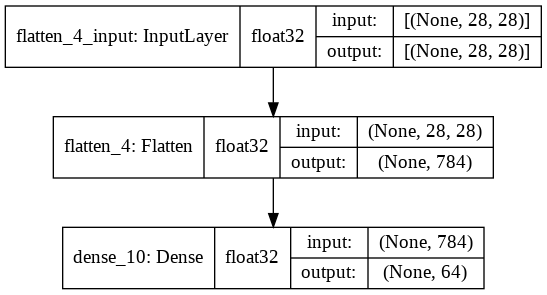

In [81]:
plot_model(encoder, show_dtype = True, show_shapes = True)

In [82]:
# 인코딩된 정보를 다시 디코딩
decoder = Sequential([
                      # 1차원일때 칸 생략 가능
                      Dense(784, activation = 'sigmoid', input_dim = 64),
                      Reshape((28, 28))
])

In [83]:
decoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


In [84]:
class Autoencoder(Model):
    def __init__(self, encoder, decoder):
        super(Autoencoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    # 학습할떄 실행되는 함수
    def call(self, x):

        # 28 * 28 데이터의 784개 데이터를 인코딩
        encoded = self.encoder(x)

        # 인코딩된 데이터를 다시 디코딩
        decoded = self.decoder(encoded)
        return decoded

In [85]:
auto_encoder = Autoencoder(encoder, decoder)

In [86]:
auto_encoder.compile(optimizer = Adam(learning_rate=0.001), loss = MeanSquaredError())

In [87]:
auto_encoder.fit(
    x =X_train, # 복원 이미지
    y = X_train, # 찐 이미지 # (복원 - 찐)^2 의 평균이 0이 되도록 학습(MSE)
    epochs = 10,
    validation_data=(X_test, X_test)

)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0237 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.008

In [92]:
# X_test를 인코더를 이용해서 64개 데이터로 압축
encoded_imgs = auto_encoder.encoder(X_test).numpy()

print(encoded_imgs[0].shape)

# 압축이미지를 원래 이미지로 복구
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()
print(decoded_imgs[0].shape)

(64,)
(28, 28)


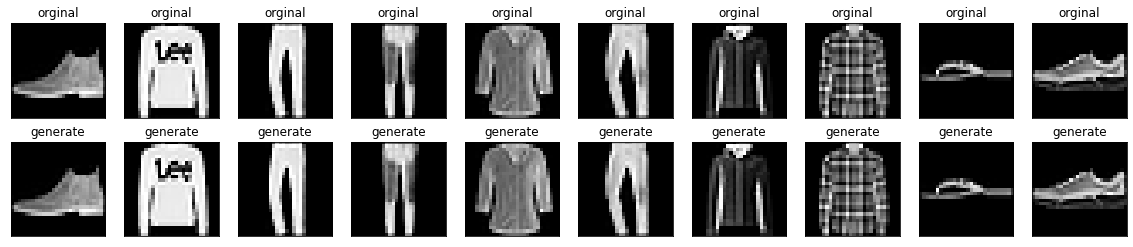

In [95]:
# 시각화
n = 10
plt.figure(figsize = (20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.title("orginal")
    plt.imshow(X_test[i])

    # 색깔 회색
    plt.gray()

    # x,y축 출력 안되게 설정
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.title("generate")
    plt.imshow(X_test[i])

    # 색깔 회색
    plt.gray()

    # x,y축 출력 안되게 설정
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## CNN을 이용한 AutoEncoder

In [96]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [97]:
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()

In [98]:
# 타입 변환
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# 차원 변환 : CNN은 4차원 
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [99]:
encoder = Sequential(
            [
              Conv2D(
                  16, kernel_size= (3,3), strides=2 , padding="SAME", activation="relu",
                  input_shape=(28,28,1)
                   ),
              Conv2D(8, kernel_size=(3,3), strides=2, padding="SAME",activation="relu" )
            ])

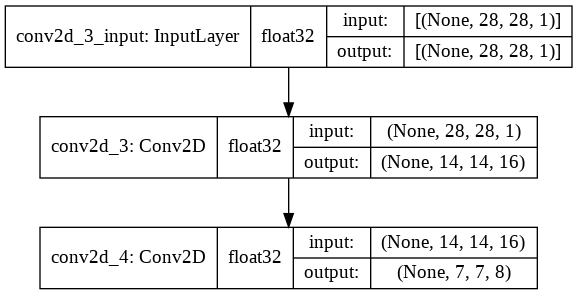

In [100]:
plot_model(encoder, show_dtype = True, show_shapes = True)

In [101]:
encoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [102]:
# 디코더
decoder = Sequential([
                      Conv2DTranspose(
                          8, kernel_size=3, padding="SAME", activation="relu"
                          ,input_shape=(7,7,8), strides=2
                        ),
                      Conv2DTranspose(
                          16, kernel_size=3, padding="SAME", activation="relu"
                          ,strides=2
                        ),
                      Conv2D(1, kernel_size=3, padding="SAME", activation="relu")

])

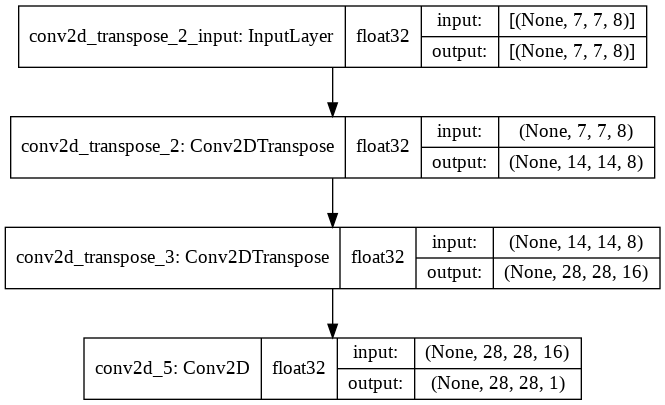

In [103]:
plot_model(decoder, show_dtype=True, show_shapes=True)

In [104]:
class AutoEncoder(Model):
    def __init__(self, encoder, decoder):
        super(AutoEncoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [105]:
auto_encoder = AutoEncoder(encoder, decoder)

In [106]:
auto_encoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

In [107]:
auto_encoder.fit(
    x =X_train, # 복원 이미지
    y = X_train, # 찐 이미지 # (복원 - 찐)^2 의 평균이 0이 되도록 학습(MSE)
    epochs = 10,
    validation_data=(X_test, X_test)

)

Epoch 1/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0092 - val_loss: 0.0031
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/10
1875/1875 [==============================] - 66s 35m

In [108]:
# X_test를 인코더를 이용해서 64개 데이터로 압축
encoded_imgs = auto_encoder.encoder(X_test).numpy()

print(encoded_imgs[0].shape)

# 압축이미지를 원래 이미지로 복구
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()
print(decoded_imgs[0].shape)

(7, 7, 8)
(28, 28, 1)


In [112]:
import tensorflow as tf

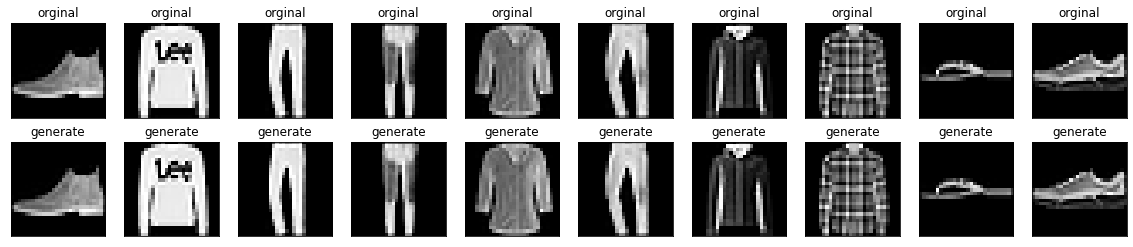

In [114]:
# 시각화
n = 10
plt.figure(figsize = (20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.title("orginal")
    plt.imshow(tf.squeeze(X_test[i]))

    # 색깔 회색
    plt.gray()

    # x,y축 출력 안되게 설정
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.title("generate")
    plt.imshow(tf.squeeze(X_test[i]))

    # 색깔 회색
    plt.gray()

    # x,y축 출력 안되게 설정
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)